**Experiment  1**
Basic Energy Consumption Estimation

Implementing a simple methodology to estimate the energy consumption of
large language models.

Factors Used:
Model Size: 175000000000.0
Training Duration (hours): 24
Hardware Power Consumption (watts): 250
Emission Factor (kgCO2/kWh): 0.5

Estimated Energy Consumption (kWh): 2.916666666666666e-13
Estimated Carbon Emissions (kgCO2): 1.458333333333333e-13


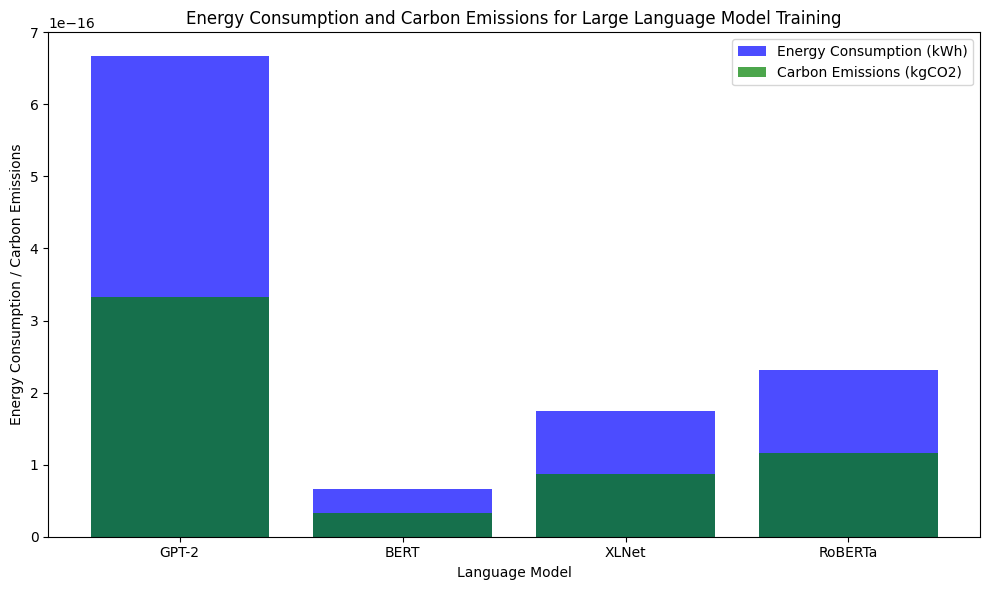

In [1]:
class EnergyEstimator:
    def __init__(self, model_size, training_duration, hardware_power_consumption):
        self.model_size = model_size
        self.training_duration = training_duration
        self.hardware_power_consumption = hardware_power_consumption

    def estimate_flops(self):
        flops_per_parameter = 1e-12
        flops = self.model_size * flops_per_parameter
        return flops

    def estimate_energy_consumption(self):
        flops = self.estimate_flops()
        training_hours = self.training_duration
        watts = self.hardware_power_consumption

        # Calculate energy consumption in kWh
        energy_consumption_kwh = (flops * training_hours) / (3600 * 1e12) * watts

        return energy_consumption_kwh

    def convert_to_carbon_emissions(self, energy_consumption_kwh, emission_factor):

        carbon_emissions_kg = energy_consumption_kwh * emission_factor
        return carbon_emissions_kg


# Factors used:
model_size = 175e9
training_duration = 24
hardware_power_consumption = 250
emission_factor = 0.5

estimator = EnergyEstimator(model_size, training_duration, hardware_power_consumption)
energy_consumption_kwh = estimator.estimate_energy_consumption()
carbon_emissions_kg = estimator.convert_to_carbon_emissions(energy_consumption_kwh, emission_factor)

# Print factors used and results
print("Factors Used:")
print("Model Size:", model_size)
print("Training Duration (hours):", training_duration)
print("Hardware Power Consumption (watts):", hardware_power_consumption)
print("Emission Factor (kgCO2/kWh):", emission_factor)

print("\nEstimated Energy Consumption (kWh):", energy_consumption_kwh)
print("Estimated Carbon Emissions (kgCO2):", carbon_emissions_kg)

class EnergyEstimator:
    def __init__(self, model_size, training_duration, hardware_power_consumption):
        self.model_size = model_size
        self.training_duration = training_duration
        self.hardware_power_consumption = hardware_power_consumption

    def estimate_flops(self):

        flops_per_parameter = 1e-12
        flops = self.model_size * flops_per_parameter
        return flops

    def estimate_energy_consumption(self):
        flops = self.estimate_flops()
        training_hours = self.training_duration
        watts = self.hardware_power_consumption


        energy_consumption_kwh = (flops * training_hours) / (3600 * 1e12) * watts

        return energy_consumption_kwh

    def convert_to_carbon_emissions(self, energy_consumption_kwh, emission_factor):

        carbon_emissions_kg = energy_consumption_kwh * emission_factor
        return carbon_emissions_kg


# Training data
training_data = [
    {"model": "GPT-2", "size": 1e9, "duration_hours": 12, "hardware_power": 200},
    {"model": "BERT", "size": 200e6, "duration_hours": 8, "hardware_power": 150},
    {"model": "XLNet", "size": 350e6, "duration_hours": 10, "hardware_power": 180},
    {"model": "RoBERTa", "size": 270e6, "duration_hours": 14, "hardware_power": 220}
]

# Emission factor for electricity source in kgCO2/kWh
emission_factor = 0.5

# Initialize lists to store results
energy_consumptions = []
carbon_emissions = []

# Calculate energy consumption and carbon emissions for each training instance
for data in training_data:
    estimator = EnergyEstimator(data["size"], data["duration_hours"], data["hardware_power"])
    energy_consumption_kwh = estimator.estimate_energy_consumption()
    carbon_emissions_kg = estimator.convert_to_carbon_emissions(energy_consumption_kwh, emission_factor)

    energy_consumptions.append(energy_consumption_kwh)
    carbon_emissions.append(carbon_emissions_kg)

# Plotting results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(range(len(training_data)), energy_consumptions, color='blue', alpha=0.7, label='Energy Consumption (kWh)')
plt.bar(range(len(training_data)), carbon_emissions, color='green', alpha=0.7, label='Carbon Emissions (kgCO2)')
plt.xticks(range(len(training_data)), [data["model"] for data in training_data])
plt.xlabel('Language Model')
plt.ylabel('Energy Consumption / Carbon Emissions')
plt.title('Energy Consumption and Carbon Emissions for Large Language Model Training')
plt.legend()
plt.tight_layout()
plt.show()


In [2]:
import csv
import random

class EnergyEstimator:
    def __init__(self, model_size, training_duration, hardware_power_consumption):
        self.model_size = model_size
        self.training_duration = training_duration
        self.hardware_power_consumption = hardware_power_consumption

    def estimate_flops(self):
        flops_per_parameter = 1e-12  # Value for FLOPS per parameter
        flops = self.model_size * flops_per_parameter
        return flops

    def estimate_energy_consumption(self):
        flops = self.estimate_flops()
        training_hours = self.training_duration
        watts = self.hardware_power_consumption

        # Calculate energy consumption in kWh
        energy_consumption_kwh = (flops * training_hours) / (3600 * 1e12) * watts

        return energy_consumption_kwh

    def convert_to_carbon_emissions(self, energy_consumption_kwh, emission_factor):

        carbon_emissions_kg = energy_consumption_kwh * emission_factor
        return carbon_emissions_kg

# Training data
training_data = [
    {"model": "GPT-2", "duration_hours": random.uniform(6, 24)},
    {"model": "BERT", "duration_hours": random.uniform(4, 12)},
    {"model": "XLNet", "duration_hours": random.uniform(8, 20)},
    {"model": "RoBERTa", "duration_hours": random.uniform(10, 28)}
]

# Initialize lists to store generated data
generated_data = []

# Calculate the number of samples for each model
total_samples = 4000
samples_per_model = total_samples // len(training_data)

# Generate samples for each model
for data in training_data:
    model = data["model"]
    duration_hours = data["duration_hours"]

    for _ in range(samples_per_model):
        # Randomly select model size, hardware power consumption, and emission factor
        model_size = random.uniform(1e9, 1e12)
        hardware_power = random.uniform(100, 300)
        emission_factor = random.uniform(0.3, 0.7)

        # Calculate energy consumption
        estimator = EnergyEstimator(model_size, duration_hours, hardware_power)
        energy_consumption_kwh = estimator.estimate_energy_consumption()

        # Convert energy consumption to carbon emissions
        carbon_emissions_kg = estimator.convert_to_carbon_emissions(energy_consumption_kwh, emission_factor)

        generated_data.append([model, int(model_size), round(duration_hours, 2), round(hardware_power, 2),
                               round(emission_factor, 2), round(energy_consumption_kwh, 2), round(carbon_emissions_kg, 2)])

# Write the generated data into a CSV file
with open('generated_data.csv', mode='w', newline='') as file:
    writer = csv.writer(file)

    # Write the header row
    writer.writerow(['Model', 'Model Size', 'Training Duration (hours)', 'Hardware Power Consumption (watts)',
                     'Emission Factor (kgCO2/kWh)', 'Estimated Energy Consumption (kWh)',
                     'Estimated Carbon Emissions (kgCO2)'])

    # Write data for each model
    writer.writerows(generated_data)

print("CSV file generated successfully!")


CSV file generated successfully!


In [3]:
import pandas as pd

# Load the data from the CSV file
data = pd.read_csv('/content/carbon emission of each model .csv')

total_carbon_emissions = data['Estimated Carbon Emissions (kgCO2)'].sum()

print("Total Carbon Emissions across all samples:", total_carbon_emissions, "kgCO2")


Total Carbon Emissions across all samples: 5.67397235026007e-13 kgCO2


**Experiment 2**


In [4]:
data = pd.read_csv('/content/LLM Lifecycle data.csv')

In [5]:
data.head()

,Algorithm,Domain,Training Time (Days),Hardware Used,Energy Consumption (MWh),Carbon Footprint (gCO2e),Equivalent,Estimated Energy Consumption (MWh)
0,BERT,Computer Vision,26.359613,TPU v3,696.599067,198694,5 years of refrigerator energy consumption,511.430484
1,Meena,NLP,18.397553,TPU-v3 Pod containing 2048 TPU cores,371.620040,131525,10 hours of television streaming,338.663766
2,GEANT4-DNA,Speech Recognition,78.663411,TPU-v3 Pod containing 2048 TPU cores,923.127060,288700,75 flights between London and Paris,631.890609
3,BERT,Speech Recognition,98.275626,TPU-v3 Pod containing 2048 TPU cores,104.013830,184544,75 flights between London and Paris,586.664608
4,Evolved Transformer (Medium),Speech Recognition,31.170672,TPU v2,539.103028,321741,1500 hours of LED bulb usage,93.591977


In [6]:
print(data.columns)

Index(['Algorithm', 'Domain', 'Training Time (Days)', 'Hardware Used',
       'Energy Consumption (MWh)', 'Carbon Footprint (gCO2e)', 'Equivalent',
       'Estimated Energy Consumption (MWh)'],
      dtype='object')


In [7]:

null_values = data.isnull().sum()
print("Null Values:")
print(null_values)


Null Values:
Algorithm                             0
Domain                                0
Training Time (Days)                  0
Hardware Used                         0
Energy Consumption (MWh)              0
Carbon Footprint (gCO2e)              0
Equivalent                            0
Estimated Energy Consumption (MWh)    0
dtype: int64


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Algorithm                           500 non-null    object 
 1   Domain                              500 non-null    object 
 2   Training Time (Days)                500 non-null    float64
 3   Hardware Used                       500 non-null    object 
 4   Energy Consumption (MWh)            500 non-null    float64
 5   Carbon Footprint (gCO2e)            500 non-null    int64  
 6   Equivalent                          500 non-null    object 
 7   Estimated Energy Consumption (MWh)  500 non-null    float64
dtypes: float64(3), int64(1), object(4)
memory usage: 31.4+ KB
None

Summary Statistics:
       Training Time (Days)  Energy Consumption (MWh)  \
count            500.000000                500.000000   
mean              49.4

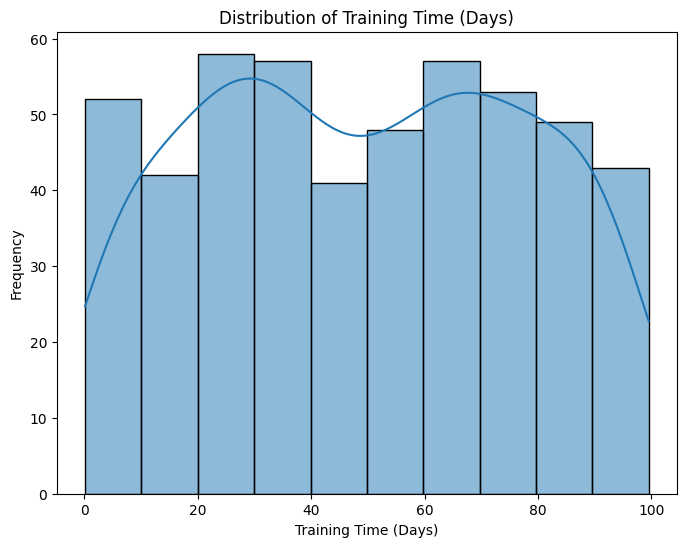

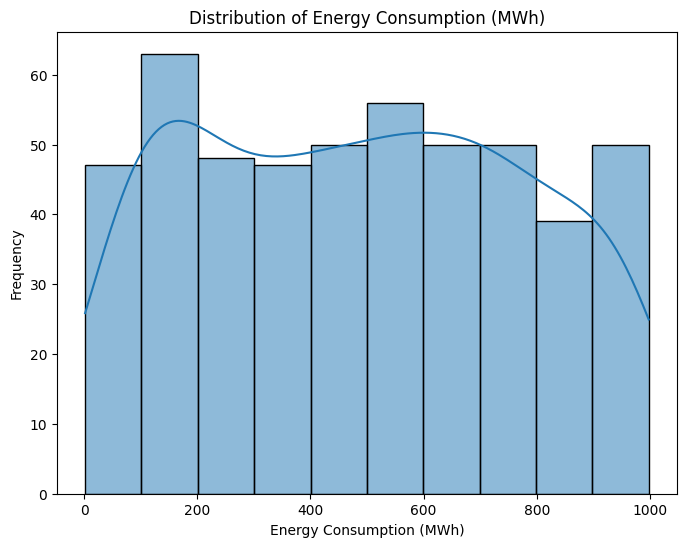

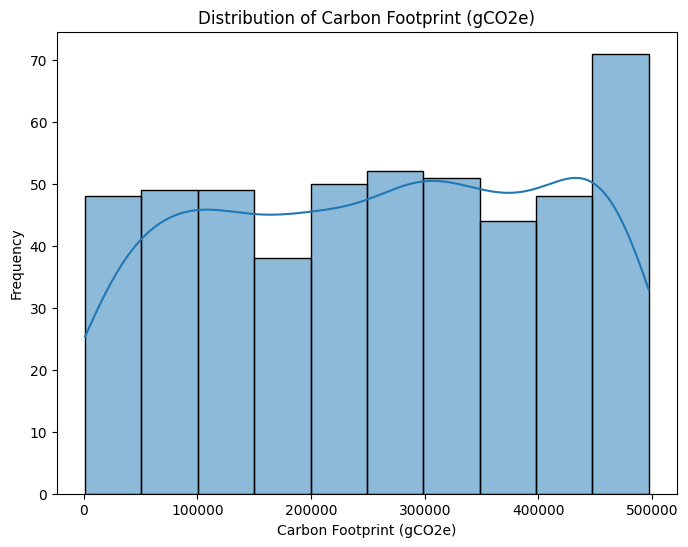

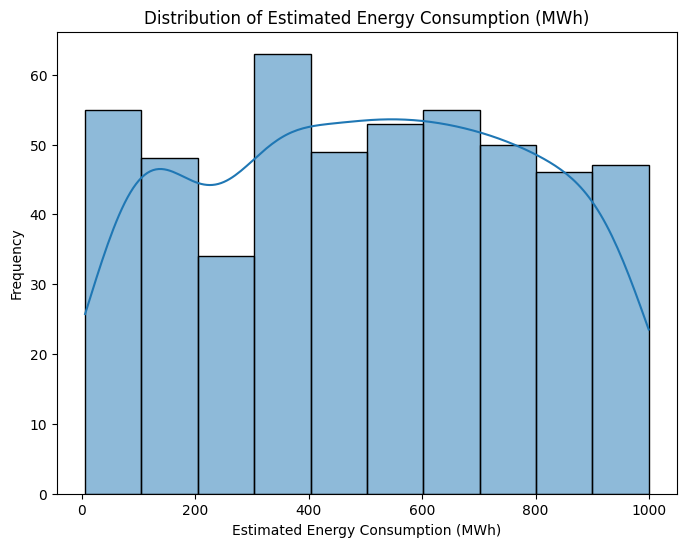

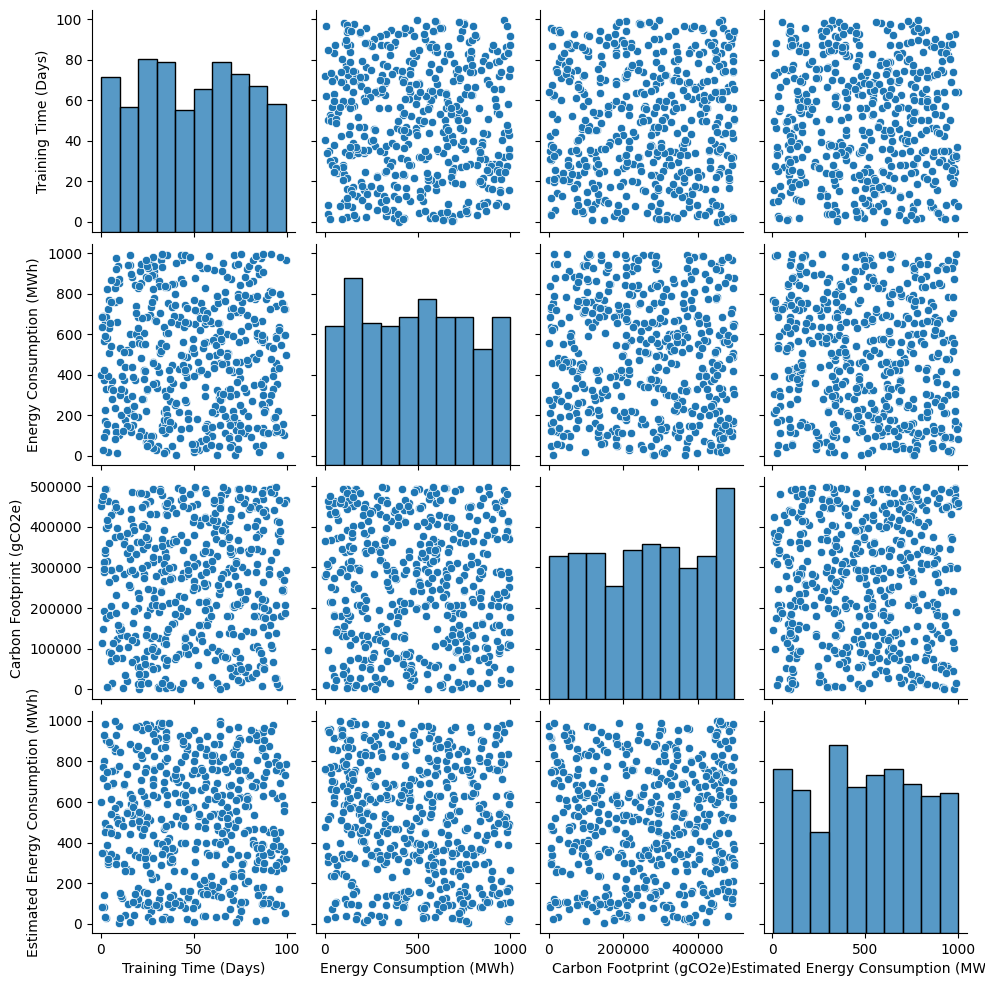

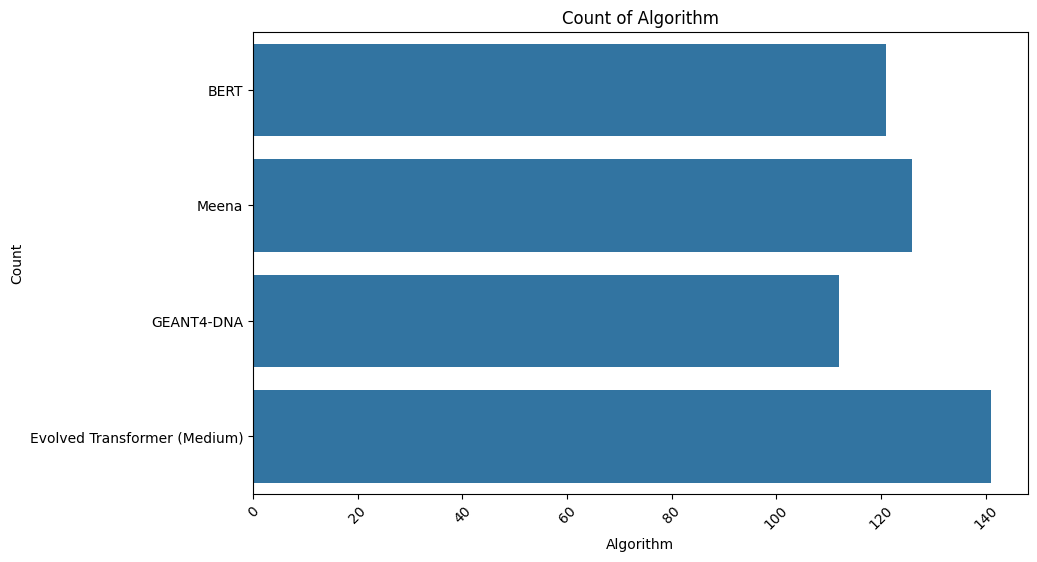

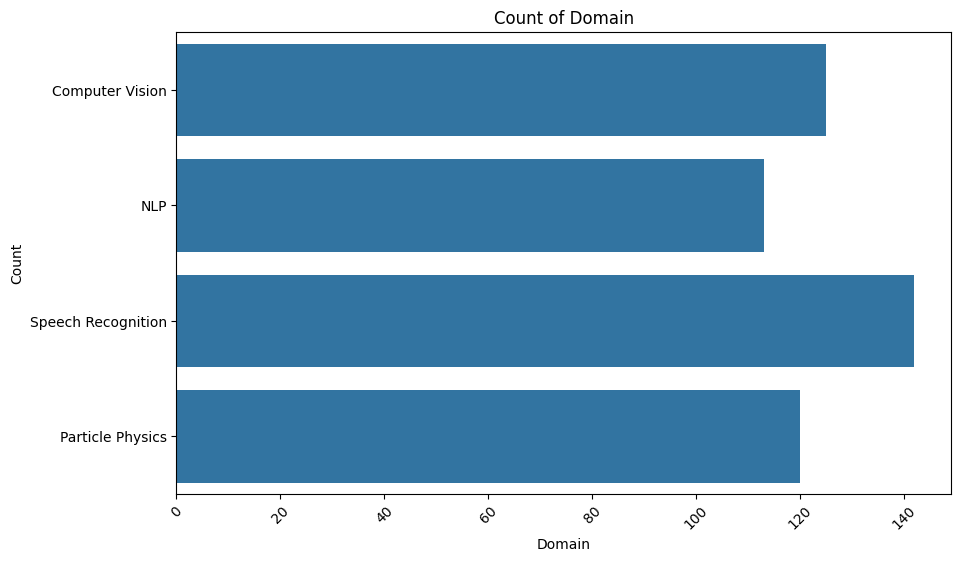

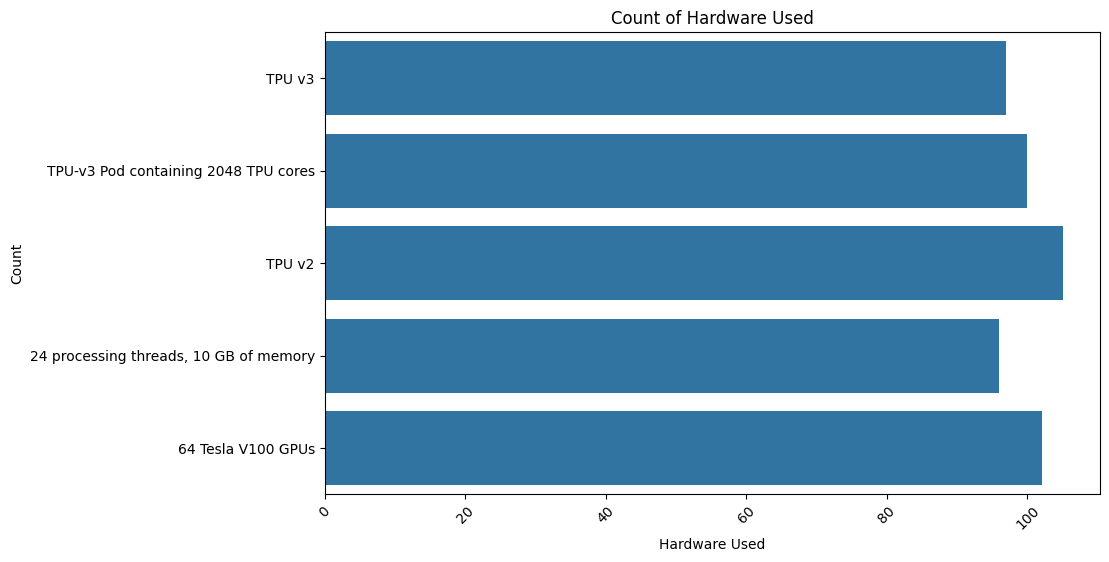

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '/content/LLM Lifecycle data.csv'
data = pd.read_csv(file_path)


print("Dataset Information:")
print(data.info())


print("\nSummary Statistics:")
print(data.describe())

numerical_cols = ['Training Time (Days)', 'Energy Consumption (MWh)', 'Carbon Footprint (gCO2e)', 'Estimated Energy Consumption (MWh)']
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

sns.pairplot(data[numerical_cols])
plt.show()

categorical_cols = ['Algorithm', 'Domain', 'Hardware Used']
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data[col])
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


In [9]:

def read_lifecycle_data(file_path):
    """
    Read lifecycle data from CSV file.
    """
    return pd.read_csv(file_path)

def analyze_lifecycle(data):
    """
    Analyze carbon emissions across the lifecycle of LLMs.
    """
    total_emissions = data['Carbon Footprint (gCO2e)'].sum()


    hotspot_stage = data.loc[data['Carbon Footprint (gCO2e)'].idxmax(), 'Algorithm']
    hotspot_emissions = data['Carbon Footprint (gCO2e)'].max()

    return total_emissions, hotspot_stage, hotspot_emissions


def generate_report(total_emissions, hotspot_stage, hotspot_emissions):
    """
    Generate a comprehensive report based on the analysis.
    """

    report = f"""Carbon Footprint Modeling Report for Large Language Models (LLMs)

    Total Carbon Emissions: {total_emissions} gCO2e

    Hotspot Identified:
    - Algorithm: {hotspot_stage}
    - Carbon Footprint: {hotspot_emissions} gCO2e

    Recommendations:
    - Implement energy-efficient hardware design and optimize model inference algorithms.
    - Integrate renewable energy sources in data center operations.
    - Establish recycling programs for hardware components and data center equipment.

    """

    return report

def main():

    file_path = '/content/LLM Lifecycle data.csv'
    lifecycle_data = read_lifecycle_data(file_path)

    total_emissions, hotspot_stage, hotspot_emissions = analyze_lifecycle(lifecycle_data)

    report = generate_report(total_emissions, hotspot_stage, hotspot_emissions)

    #Print the report
    print(report)

if __name__ == "__main__":
    main()


Carbon Footprint Modeling Report for Large Language Models (LLMs)

    Total Carbon Emissions: 130039241 gCO2e

    Hotspot Identified:
    - Algorithm: GEANT4-DNA
    - Carbon Footprint: 497039 gCO2e

    Recommendations:
    - Implement energy-efficient hardware design and optimize model inference algorithms.
    - Integrate renewable energy sources in data center operations.
    - Establish recycling programs for hardware components and data center equipment.

    


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


file_path = '/content/LLM Lifecycle data.csv'
data = pd.read_csv(file_path)
X = data[['Energy Consumption (MWh)', 'Estimated Energy Consumption (MWh)']]
y = data['Carbon Footprint (gCO2e)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
accuracy_score = model.score(X_test, y_test)

print(f"Mean Squared Error: {mse}")
print(f"Accuracy Score: {accuracy_score}")


Mean Squared Error: 19667694524.564404
Accuracy Score: 0.004596416624544686
